# Mercado Livre API - Overview da API a partir de uma query
Esse notebook apresenta diferentes métricas que se pode obter ao realizar uma query à API do Mercado Libre. 

(No momento, experimentando com diferentes visualizações. Ao finalizar uma versão, a descrição dos passos será completada de acordo).

## Imports e configurações gerais

In [89]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import requests
import pandas as pd

from pandas import Series, DataFrame

from IPython.core.display import Image, display

# Charts styling
#plt.style.use('fivethirtyeight')
#plt.style.use('bmh')
plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8 # increases figure size
matplotlib.rcParams.update({'font.size': 14}) # increases chart font size
rcParams['font.family'] = 'Arial Narrow'

In [90]:
# style to enhance df viz, from https://github.com/brandon-rhodes/pycon-pandas-tutorial
from IPython.core.display import HTML
css = open('style-table.css').read() #+ open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Parâmetros de entrada

In [91]:
# Sets input parameters 
DAYS_AGO = 365 # days to look back in visits history
ITEMS_TO_QUERY = 200 # max. number of results returned from query (max. permitted by ML is 200)
ITEMS_TO_PLOT = 10 # list of "ITEMS_TO_PLOT" top sold items; e.g. if 10, visits from top 10 sold itens will be plotted

## Busca de itens a partir de uma query definida pelo usuário

- Get dos resultados da busca
- Ordenamento dos itens por mais vendidos e remoção de itens duplicados
- Corte de itens pelo limite *ITEMS_TO_PLOT*

In [92]:
### REQUEST: gets items according to search for 'query' 

#query = "kit painel solar"
query = input('Qual a query desejada? ')

url = 'https://api.mercadolibre.com/sites/MLB/search?q=' + query +'&limit=' + str(ITEMS_TO_QUERY)
print('Buscando por "' + query + '"...')
data = requests.get(url).json()

results = data["results"] # saves content from json in variable
df = DataFrame(results) # converts to a pandas df
print(str(len(df)) + ' itens encontrados.')

Qual a query desejada? chinelo rider
Buscando por "chinelo rider"...
200 itens encontrados.


In [93]:
#df.seller[0]

In [94]:
df = df[["id", "title", "price", "sold_quantity", "available_quantity", "permalink", "thumbnail", "seller_address"]] # gets only interesting columns

# sorts items by sold quantity and deletes duplicates with less sales (assuming they'd be 0)
df = df.sort_values(by="sold_quantity", ascending=False)
df = df.drop_duplicates(subset=['title'], keep='first')

ids = df.id.values[0:ITEMS_TO_PLOT] # gets top sold items ML ids in a list

df = df.set_index('id') # sets index to id

# adds revenue column by an operation with sold_quantity and price
df['revenue'] = df['sold_quantity'] * df['price']
total_revenue = df['revenue'].sum()


#df
df.head()

,title,price,sold_quantity,available_quantity,permalink,thumbnail,seller_address,revenue
id,,,,,,,,
MLB704216024,Chinelo Masculino Rider Ventor Gaspea (leia To...,49.90,173,13,http://produto.mercadolivre.com.br/MLB-7042160...,http://mlb-s2-p.mlstatic.com/773321-MLB2076734...,"{'longitude': -46.7401869, 'city': {'name': 'C...",8632.70
MLB755695267,Chinelo Masculino Rider Drive Iii Gaspea (leia...,29.90,90,14,http://produto.mercadolivre.com.br/MLB-7556952...,http://mlb-s1-p.mlstatic.com/117911-MLB2066369...,"{'longitude': -46.7401869, 'city': {'name': 'C...",2691.00
MLB758460362,Chinelo Masculino Rider Cartago Super Macio Ma...,69.99,19,40,http://produto.mercadolivre.com.br/MLB-7584603...,http://mlb-s1-p.mlstatic.com/527305-MLB2084808...,"{'longitude': -46.4954061, 'city': {'name': 'S...",1329.81
MLB683361384,Chinelo Sandália Rider Masculino 44 Ao 46frete...,59.99,19,68,http://produto.mercadolivre.com.br/MLB-6833613...,http://mlb-s1-p.mlstatic.com/902711-MLB2060147...,"{'longitude': -46.4954061, 'city': {'name': 'S...",1139.81
MLB685137798,Chinelo 46 Masculino Novo Rider Gaspea Sem Ded...,42.99,18,69,http://produto.mercadolivre.com.br/MLB-6851377...,http://mlb-s1-p.mlstatic.com/555611-MLB2060147...,"{'longitude': -46.4954061, 'city': {'name': 'S...",773.82


## Resultado da busca

Os 10 itens mais vendidos: 



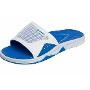

MLB704216024 - Chinelo Masculino Rider Ventor Gaspea (leia Todo O Anúncio)
http://produto.mercadolivre.com.br/MLB-704216024-chinelo-masculino-rider-ventor-gaspea-leia-todo-o-anuncio-_JM


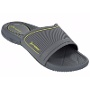

MLB755695267 - Chinelo Masculino Rider Drive Iii Gaspea (leia O Anúncio)
http://produto.mercadolivre.com.br/MLB-755695267-chinelo-masculino-rider-drive-iii-gaspea-leia-o-anuncio-_JM


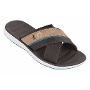

MLB758460362 - Chinelo Masculino Rider Cartago Super Macio Macio+frete Gts
http://produto.mercadolivre.com.br/MLB-758460362-chinelo-masculino-rider-cartago-super-macio-maciofrete-gts-_JM


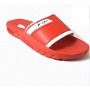

MLB683361384 - Chinelo Sandália Rider Masculino 44 Ao 46frete Gratis
http://produto.mercadolivre.com.br/MLB-683361384-chinelo-sandalia-rider-masculino-44-ao-46frete-gratis-_JM


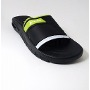

MLB685137798 - Chinelo 46 Masculino Novo Rider Gaspea Sem Dedo +mais Brinde
http://produto.mercadolivre.com.br/MLB-685137798-chinelo-46-masculino-novo-rider-gaspea-sem-dedo-mais-brinde-_JM


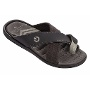

MLB741410700 - Chinelo Sandália Original Rider Cartago  Masculino+brinde
http://produto.mercadolivre.com.br/MLB-741410700-chinelo-sandalia-original-rider-cartago-masculinobrinde-_JM


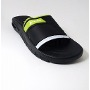

MLB733533668 - Chinelo Original Masculino Rider Tamanhos Grandes 45/46
http://produto.mercadolivre.com.br/MLB-733533668-chinelo-original-masculino-rider-tamanhos-grandes-4546-_JM


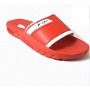

MLB683369374 - Chinelo Sandalia  Rider Masculino Gaspea 44ao46 Frete Gratis
http://produto.mercadolivre.com.br/MLB-683369374-chinelo-sandalia-rider-masculino-gaspea-44ao46-frete-gratis-_JM


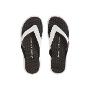

MLB712262927 - Chinelos Rider R1 Plus - Branco/preto
http://produto.mercadolivre.com.br/MLB-712262927-chinelos-rider-r1-plus-brancopreto-_JM


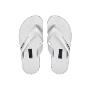

MLB712660663 - Chinelos Rider Curve Light - Branco/branco/preto
http://produto.mercadolivre.com.br/MLB-712660663-chinelos-rider-curve-light-brancobrancopreto-_JM


In [95]:
# prints URLs from itens in chart

print('Os ' + str(ITEMS_TO_PLOT) + ' itens mais vendidos:', '\n')
for index, row in df.head(ITEMS_TO_PLOT).iterrows():
    display(Image(df.loc[index, 'thumbnail']))
    print(index + ' - ' + df.loc[index, 'title']) # uses loc taking advantage of indexing by id made previously
    print(df.loc[index, 'permalink'])
    

## Itens mais vendidos e seus preços

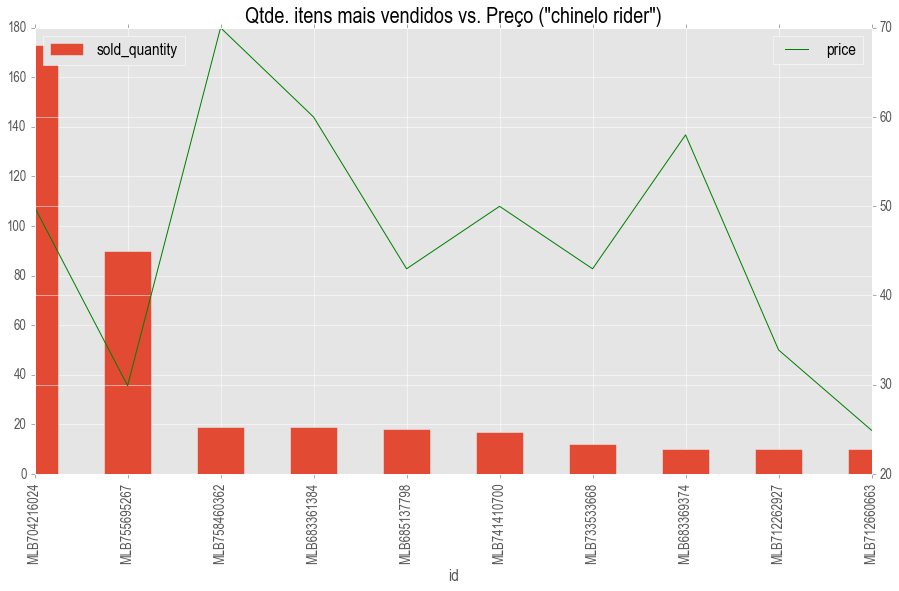

In [96]:
# sold quantity vs. unit price

# procedure to handle secondary Y axis
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

y0 = df.head(ITEMS_TO_PLOT).sold_quantity.plot(kind='bar', ax=ax0)#, label='Itens vendidos')
y1 = df.head(ITEMS_TO_PLOT).price.plot(secondary_y=True, style='g', ax=ax1)#, label='Preço unitário')
y0.legend(loc=2) # bar legend to the left
y1.legend(loc=0) # line legend to the right

plt.title('Qtde. itens mais vendidos vs. Preço ("' + query + '")', fontsize=22)
plt.show()
plt.close()

## Faturamento por item

O faturamento total ("chinelo rider") = R$ 30761.08


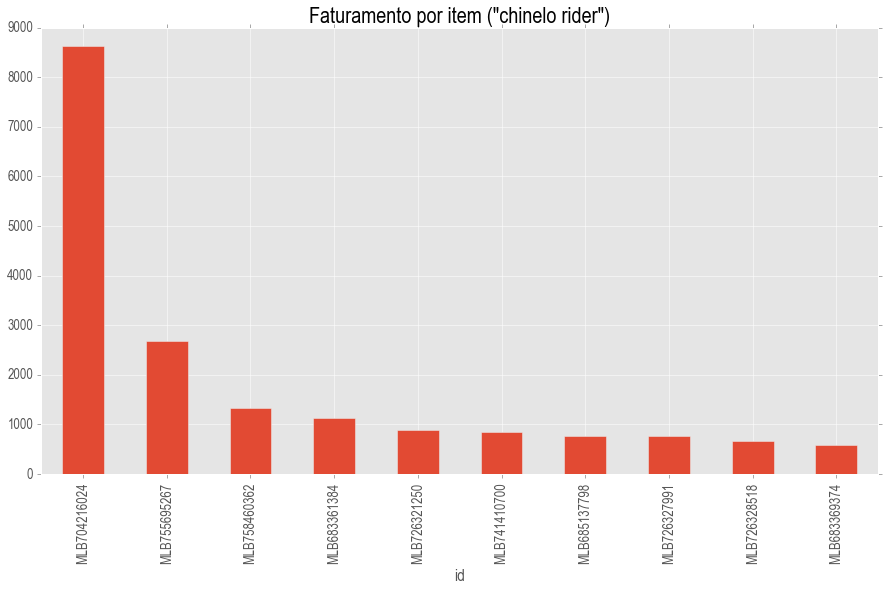

In [97]:
print('O faturamento total ("' + query + '") = R$ ' + str(total_revenue))
df['revenue'].sort_values(ascending=False).head(ITEMS_TO_PLOT).plot(kind='bar')
plt.title('Faturamento por item ("' + query + '")', fontsize=22)

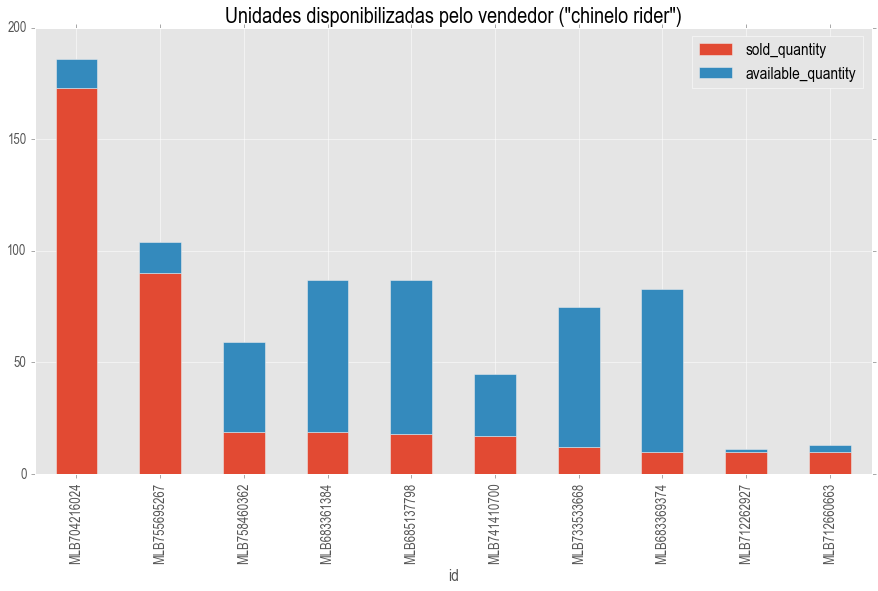

In [98]:
# total amount of each item (sold + stock)

df[['sold_quantity', 'available_quantity']].head(ITEMS_TO_PLOT).plot(kind='bar', stacked=True)
plt.title('Unidades disponibilizadas pelo vendedor ("' + query + '")', fontsize=22)

## Dados por cidade e estado (qtde. de anúncios e faturamento)

In [99]:
# location and stuff...

df2 = df # creates copy to play with

cities = [] # empty list to hold city names
states = [] # empty list to hold state names
for index, row in df2.iterrows():
    cities.append(row['seller_address']['city']['name'])    
    states.append(row['seller_address']['state']['name'])    

df2['city'] = cities
df2['state'] = states
df2.head()

,title,price,sold_quantity,available_quantity,permalink,thumbnail,seller_address,revenue,city,state
id,,,,,,,,,,
MLB704216024,Chinelo Masculino Rider Ventor Gaspea (leia To...,49.90,173,13,http://produto.mercadolivre.com.br/MLB-7042160...,http://mlb-s2-p.mlstatic.com/773321-MLB2076734...,"{'longitude': -46.7401869, 'city': {'name': 'C...",8632.70,Caieiras,São Paulo
MLB755695267,Chinelo Masculino Rider Drive Iii Gaspea (leia...,29.90,90,14,http://produto.mercadolivre.com.br/MLB-7556952...,http://mlb-s1-p.mlstatic.com/117911-MLB2066369...,"{'longitude': -46.7401869, 'city': {'name': 'C...",2691.00,Caieiras,São Paulo
MLB758460362,Chinelo Masculino Rider Cartago Super Macio Ma...,69.99,19,40,http://produto.mercadolivre.com.br/MLB-7584603...,http://mlb-s1-p.mlstatic.com/527305-MLB2084808...,"{'longitude': -46.4954061, 'city': {'name': 'S...",1329.81,São Paulo,São Paulo
MLB683361384,Chinelo Sandália Rider Masculino 44 Ao 46frete...,59.99,19,68,http://produto.mercadolivre.com.br/MLB-6833613...,http://mlb-s1-p.mlstatic.com/902711-MLB2060147...,"{'longitude': -46.4954061, 'city': {'name': 'S...",1139.81,São Paulo,São Paulo
MLB685137798,Chinelo 46 Masculino Novo Rider Gaspea Sem Ded...,42.99,18,69,http://produto.mercadolivre.com.br/MLB-6851377...,http://mlb-s1-p.mlstatic.com/555611-MLB2060147...,"{'longitude': -46.4954061, 'city': {'name': 'S...",773.82,São Paulo,São Paulo


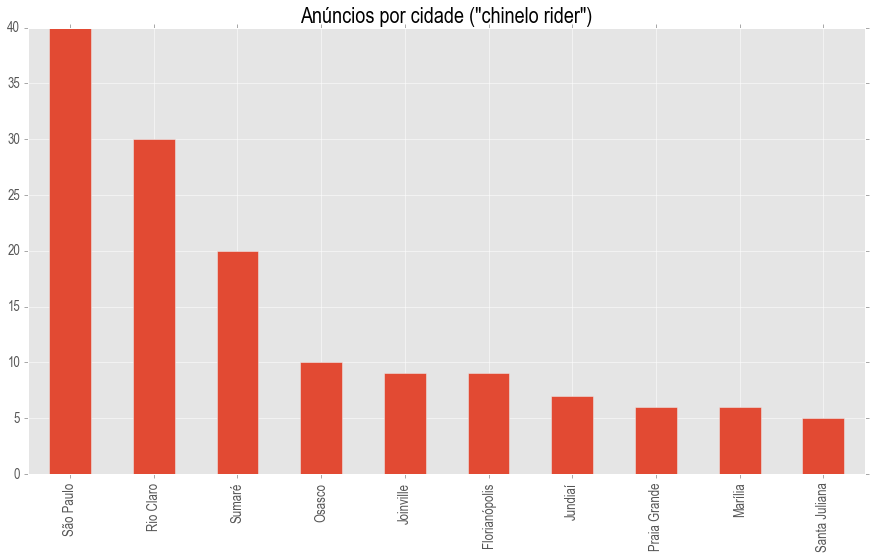

In [100]:
# plots itens by cities

df2.city.value_counts().head(10).plot(kind='bar')
plt.title('Anúncios por cidade ("' + query + '")', fontsize=22)

O faturamento total ("chinelo rider") = R$ 30761.08


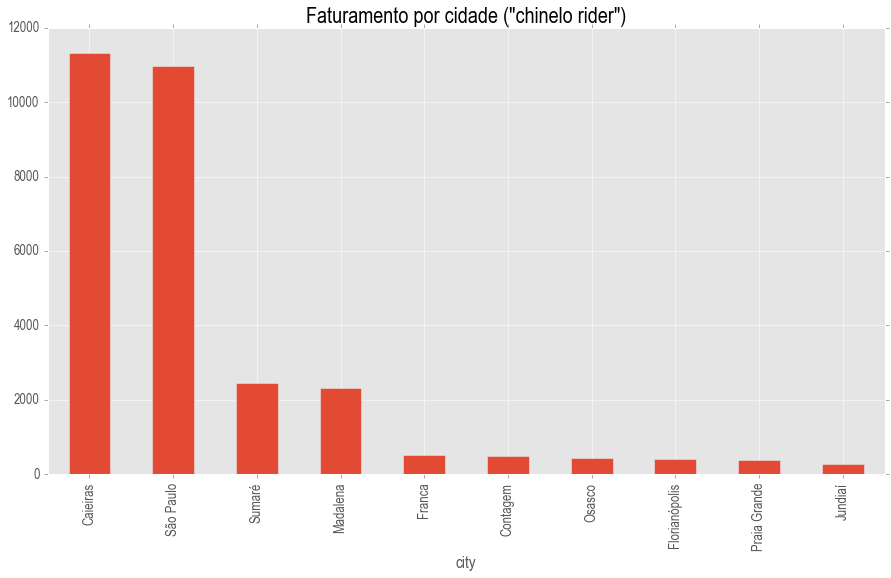

In [101]:
# revenue per city
print('O faturamento total ("' + query + '") = R$ ' + str(total_revenue))

revenue_by_city = df2.groupby('city').sum().revenue # aggregates data by city, sums by revenue
revenue_by_city.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Faturamento por cidade ("' + query + '")', fontsize=22)

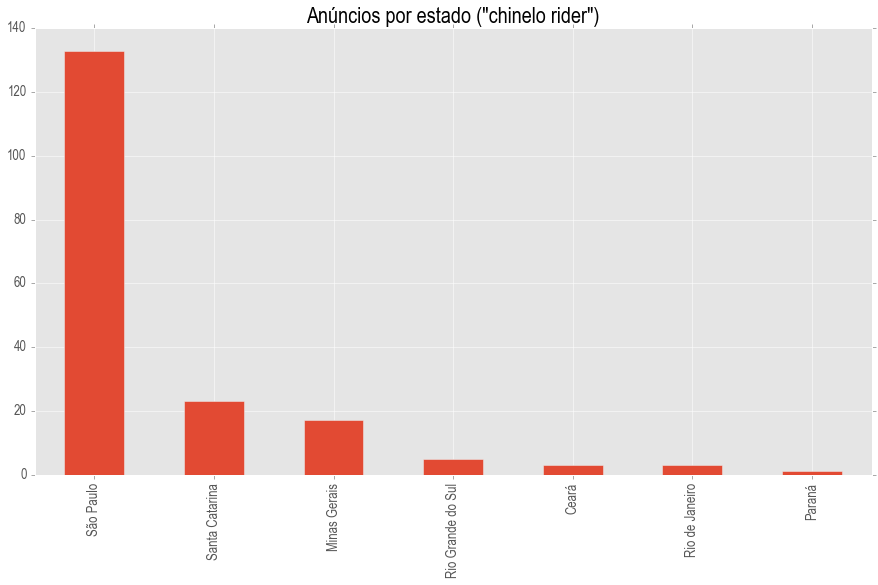

In [102]:
# plots itens by states
df2.state.value_counts().plot(kind='bar')
plt.title('Anúncios por estado ("' + query + '")', fontsize=22)

O faturamento total ("chinelo rider") = R$ 30761.08


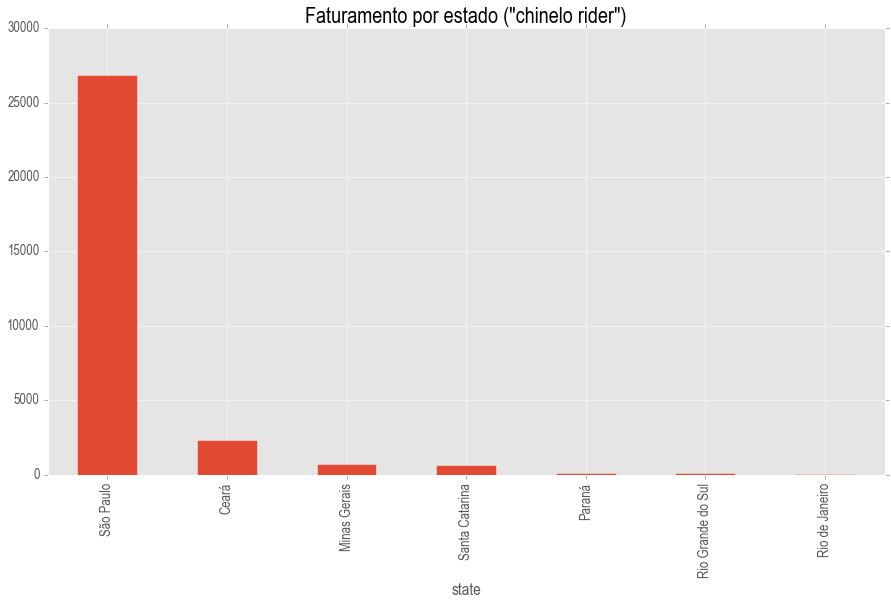

In [103]:
print('O faturamento total ("' + query + '") = R$ ' + str(total_revenue))

revenue_by_state = df2.groupby('state').sum().revenue
revenue_by_state.sort_values(ascending=False).plot(kind='bar')
plt.title('Faturamento por estado ("' + query + '")', fontsize=22)

## Request por visitas dos itens filtrados e ordenados

- Get das visitas dos itens desde *DAYS_AGO* dias atrás 
- Organização dos resultados em um único **df** indexado por data
- Headers das colunas editados para serem as ids dos itens

In [104]:
#### REQUEST: get visits (by days) for the items in 'ids'

days = DAYS_AGO # number of days ago to consider
ids_string = ','.join(ids) # makes comma-separated string from list to use in URL

url = 'https://api.mercadolibre.com/items/visits/time_window?ids=' + ids_string +'&last=' + str(days) + '&unit=day'
data = requests.get(url).json()

visits_df = DataFrame(data[0]['results']) # initialize a df with the first item out of 10 (top ten in ids_string)
visits_df = visits_df[['date', 'total']] # gets only main columns
visits_df.columns = ['date', data[0]['item_id']] # renames 'total' to item's ID

column_headers = [] # list to store item ids used as column headers
column_headers.append(data[0]['item_id'])

# iterates over data items to merge all 'total' columns into same df
for item in data[1:]:
    results = item['results']
    df_temp = DataFrame(results)
    df_temp = df_temp[['date', 'total']]
    df_temp.columns = ['date', item['item_id']]
    column_headers.append(item['item_id'])
    visits_df = pd.merge(visits_df, df_temp, on='date')
    
#print(column_headers)
#visits_df.head()

In [105]:
# fixes df, parsing 'date' properly and setting as index column
visits_df['date'] = pd.to_datetime(visits_df['date'])
visits_df = visits_df.set_index('date')

visits_df.head()

,MLB704216024,MLB755695267,MLB758460362,MLB683361384,MLB685137798,MLB741410700,MLB733533668,MLB683369374,MLB712262927,MLB712660663
date,,,,,,,,,,
2015-10-20 04:00:00,2,0,0,5,0,0,0,5,0,1
2015-10-21 04:00:00,6,0,0,2,2,0,0,3,0,0
2015-10-22 04:00:00,10,0,0,1,3,0,0,3,1,1
2015-10-23 04:00:00,2,0,0,1,0,0,0,0,0,0
2015-10-24 04:00:00,3,0,0,1,0,0,0,4,0,0


## Visualização de visitas de 3 formas
- Visitas por dia (básico) (comentado)
- Média móvel de visitas (janela da média definida no código, ainda hardcoded)
- Soma acumulada de visitas (comentado)

In [106]:
#plt.figure()
#visits_df.plot(legend=True);
#plt.title('Histórico de visitas aos 10 itens mais vendidos ("' + query + '")', fontsize=22)

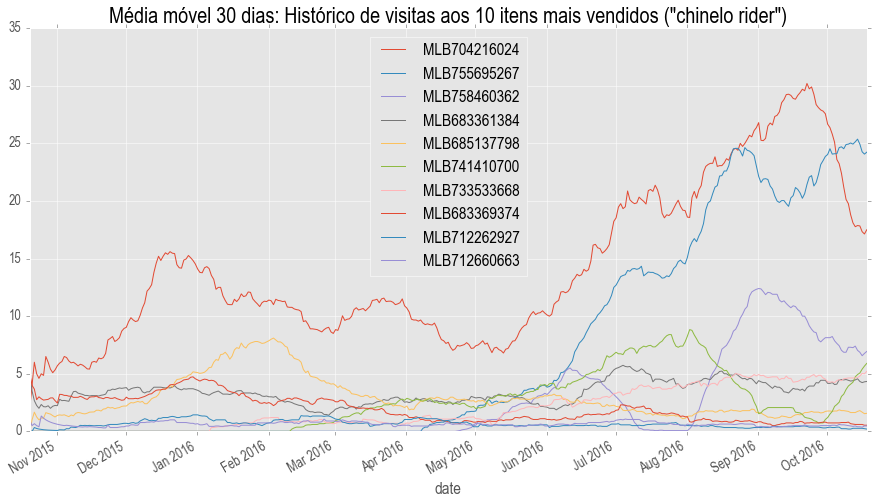

In [107]:
# calculates and plots visits' rolling mean (smoother curves)
#rolling_mean_df = visits_df.resample("1d").sum().fillna(0).rolling(window=30, min_periods=1).mean() #when resampling is needed

plt.figure();
days_rolling = 30;
rolling_mean_df = visits_df.rolling(window=days_rolling, min_periods=1).mean() # window is the # of days evaluated in rolling mean
rolling_mean_df.plot();
plt.title('Média móvel ' + str(days_rolling) + ' dias: Histórico de visitas aos 10 itens mais vendidos ("' + query + '")', fontsize=22)

In [108]:
#cumulative_visits_df = visits_df.cumsum() # calculates accumulated values to plot
#plt.figure();
#cumulative_visits_df.plot(legend=True);
#plt.title('Soma acumulada: Histórico de visitas aos 10 itens mais vendidos ("' + query + '")', fontsize=22)

## Todo:
- Plot itens by seller location
- Calculate revenue per seller (extract from seller dict in raw df)
- Fix query handling for 0 results
- Fix query handling for null query as input
- Fix documentation at the end
- Filter by minimum item price

## Todo (for version as a service):
- Compare sellers' itens with competitors: "how I am performing?"